## Bayesian Modeling ##

In [69]:
import os
import sys
import importlib
from pathlib import Path
import pandas as pd
import numpy as np
import joblib

In [70]:
# 获取项目根目录
project_root = Path(os.getcwd()).parent
sys.path.append(str(project_root))

# 导入分割方法
import src.Bayesian.utils.partition as partition
importlib.reload(partition)
from src.Bayesian.utils.partition import Partition

partition = Partition()
all_centers = {
    '2_cats': partition.get_centers(4, 2),
    '4_cats': partition.get_centers(4, 4)
}

# 导入数据
processed_path = Path(project_root) / 'data' / 'processed'
learning_data = pd.read_csv(processed_path / 'Task2_processed.csv')

### 1. Base/ rational ###

In [84]:
# 导入基线模型
import src.Bayesian.M_base as model_base
importlib.reload(model_base)
from src.Bayesian.M_base import M_Base

import src.Bayesian.config as config
importlib.reload(config)
from src.Bayesian.config import config_base
model_base = M_Base(config_base)

model_base.set_centers(all_centers)

In [85]:
# 模型拟合
fitting_results = {}
for iSub, subject_data in learning_data.groupby('iSub'):
    try:
        step_results = model_base.fit_trial_by_trial(subject_data)
        fitting_results[iSub] = {
            'condition': subject_data['condition'].iloc[0],
            'step_results': step_results
        }
    except Exception as e:
        print(f"Error fitting model for subject {iSub}: {str(e)}")
        continue

In [86]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian'
os.makedirs(result_path, exist_ok=True)

filename = f'M_Base_fitting_results.joblib'
joblib.dump(fitting_results, result_path / filename)

['c:\\Users\\PC\\Desktop\\Exp1_formal\\cat_learn\\results\\Bayesian\\M_Base_fitting_results.joblib']

In [79]:
# 导入模型分析
import src.Bayesian.utils.model_evaluation as model_eval
importlib.reload(model_eval)
from src.Bayesian.utils.model_evaluation import ModelEval

model_eval = ModelEval()

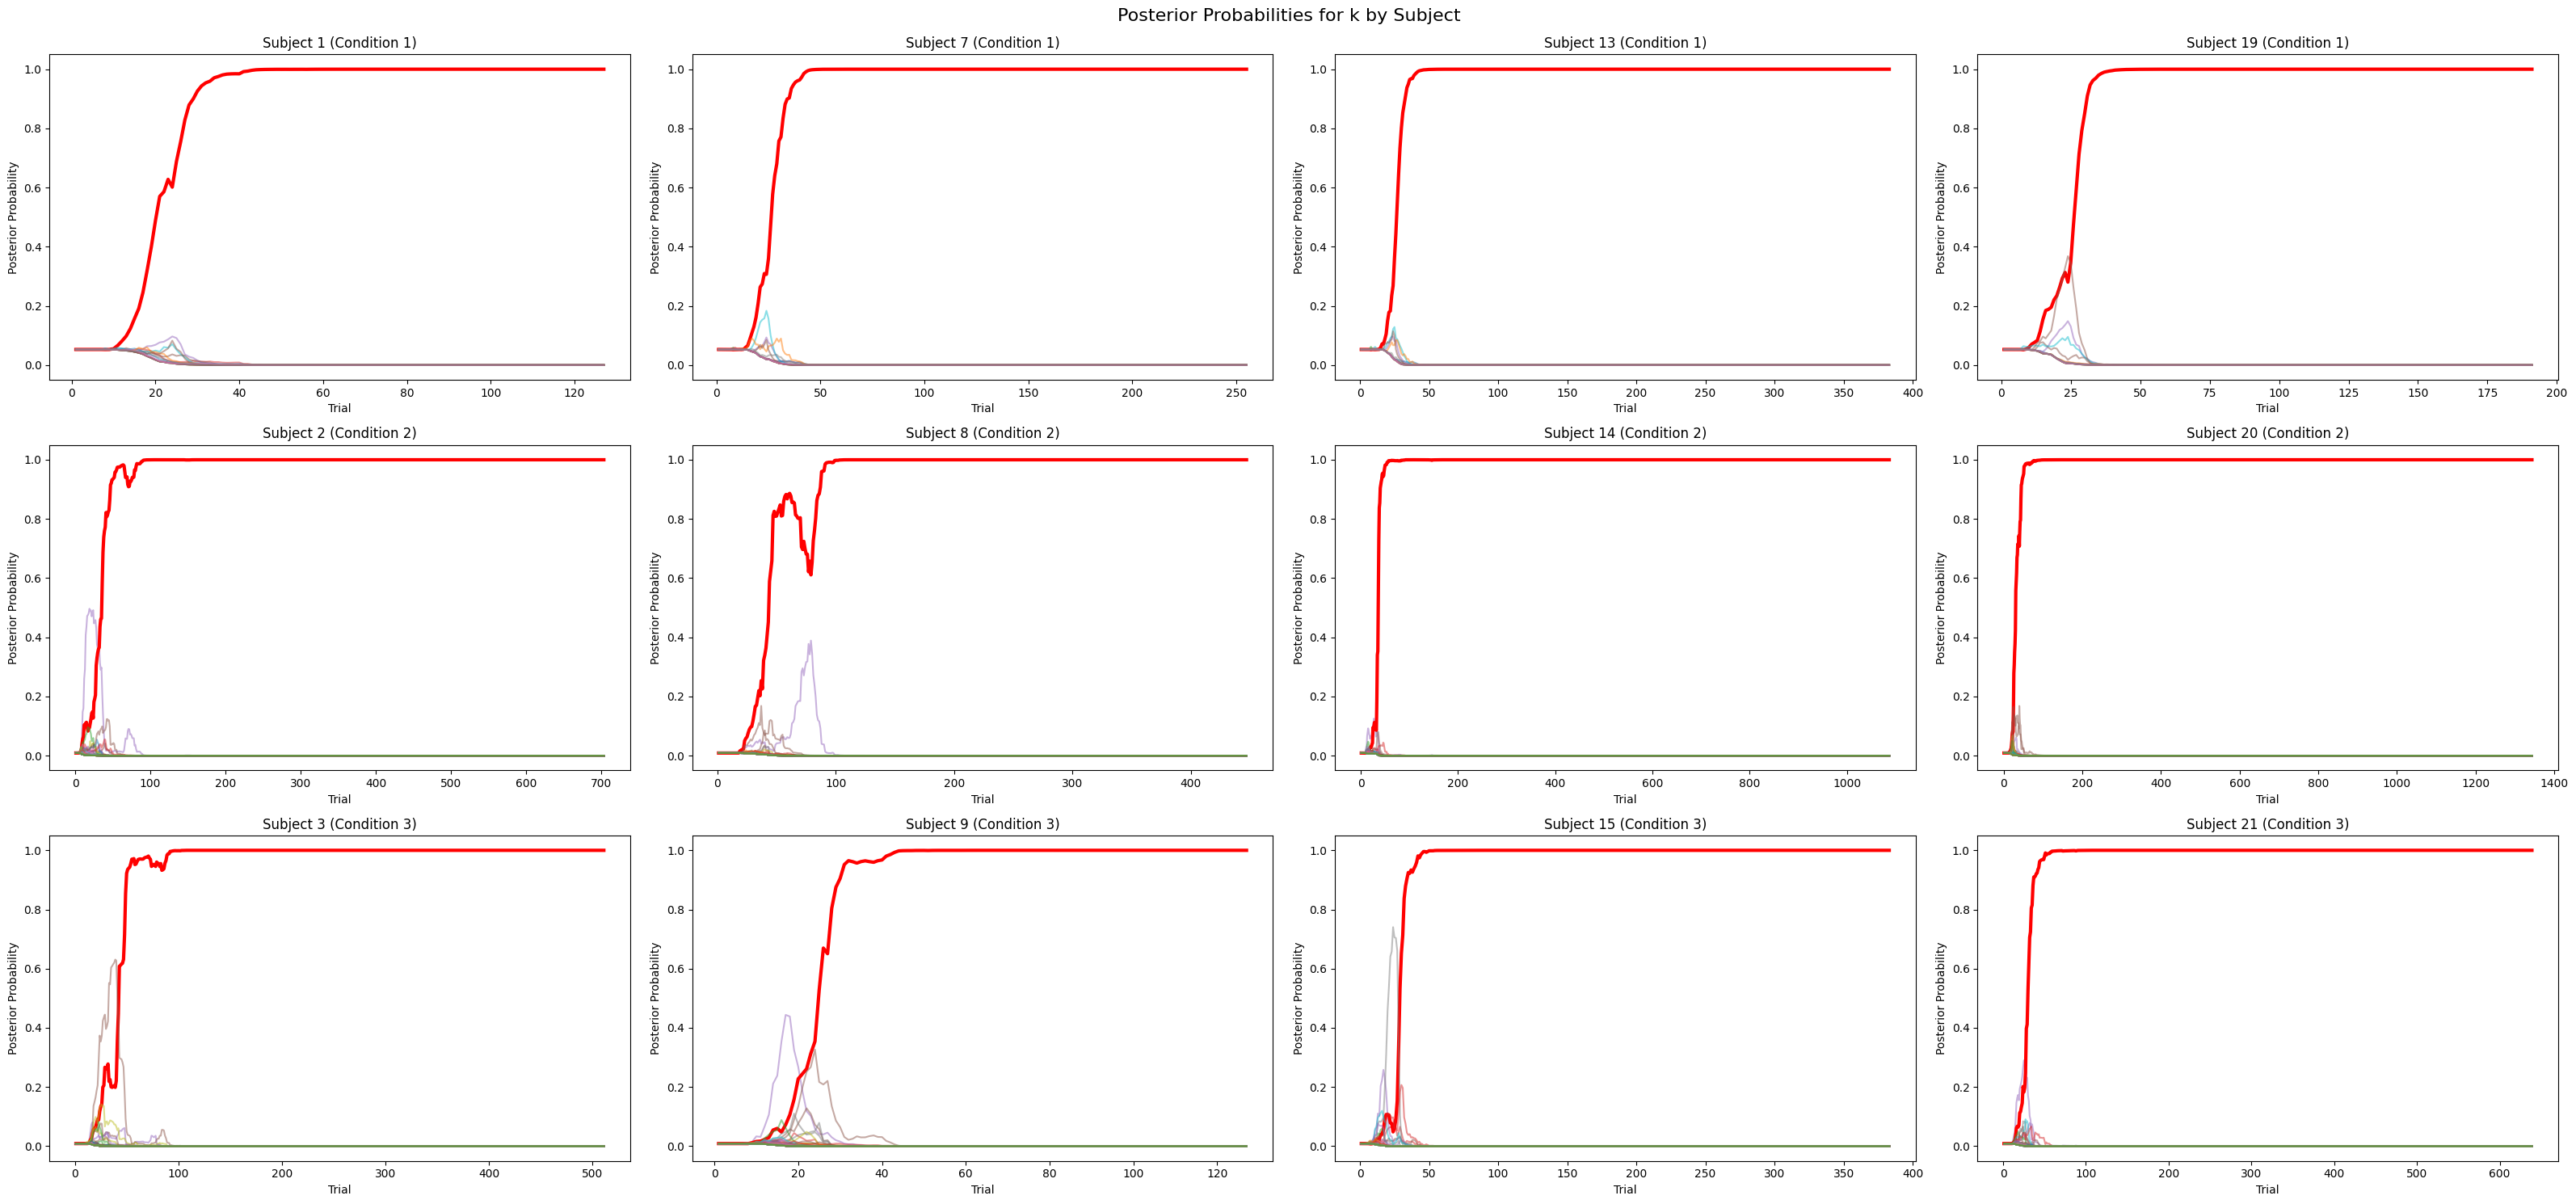

In [88]:
# 加载拟合结果
fitting_results = joblib.load(result_path / 'M_Base_fitting_results.joblib')

# 绘制后验概率变化图
filename = f'M_Base_posteriors.png'
model_eval.plot_posterior_probabilities(fitting_results, result_path / filename)

# 计算预测准确率
predictive_results = {}
for iSub, fit_result in fitting_results.items():
    try:
        subject_data = learning_data[learning_data['iSub'] == iSub]
        step_results = fit_result['step_results']
        condition = fit_result['condition']
        
        predictions = model_eval.calculate_predictions(model_base, subject_data, step_results)
        sliding_accuracy = model_eval.calculate_sliding_accuracy(predictions)
        
        predictive_results[iSub] = {
            'condition': condition,
            'step_results': step_results,
            'predictions': predictions,
            'sliding_accuracy': sliding_accuracy
        }
    except Exception as e:
        print(f"Error processing predictions for subject {iSub}: {str(e)}")
        continue

# 绘制预测准确率变化图
filename = f'M_Base_predictive_accuracy.png'
model_eval.plot_predictive_accuracy(predictive_results, result_path / filename)

### 2. + Decision Noise ###

In [75]:
# 导入模型
import src.Bayesian.M_dec as model_decision
importlib.reload(model_decision)
from src.Bayesian.M_dec import M_Dec

import src.Bayesian.config as config
importlib.reload(config)
from src.Bayesian.config import config_dec
model_decision = M_Dec(config_dec)

model_decision.set_centers(all_centers)

In [76]:
# 模型拟合
fitting_results = {}
for iSub, subject_data in learning_data.groupby('iSub'):
    try:
        step_results = model_decision.fit_trial_by_trial(subject_data)
        fitting_results[iSub] = {
            'condition': subject_data['condition'].iloc[0],
            'step_results': step_results
        }
    except Exception as e:
        print(f"Error fitting model for subject {iSub}: {str(e)}")
        continue

In [83]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian'
os.makedirs(result_path, exist_ok=True)

filename = f'M_Dec_fitting_results.joblib'
joblib.dump(fitting_results, result_path / filename)

['c:\\Users\\PC\\Desktop\\Exp1_formal\\cat_learn\\results\\Bayesian\\M_Dec_fitting_results.joblib']

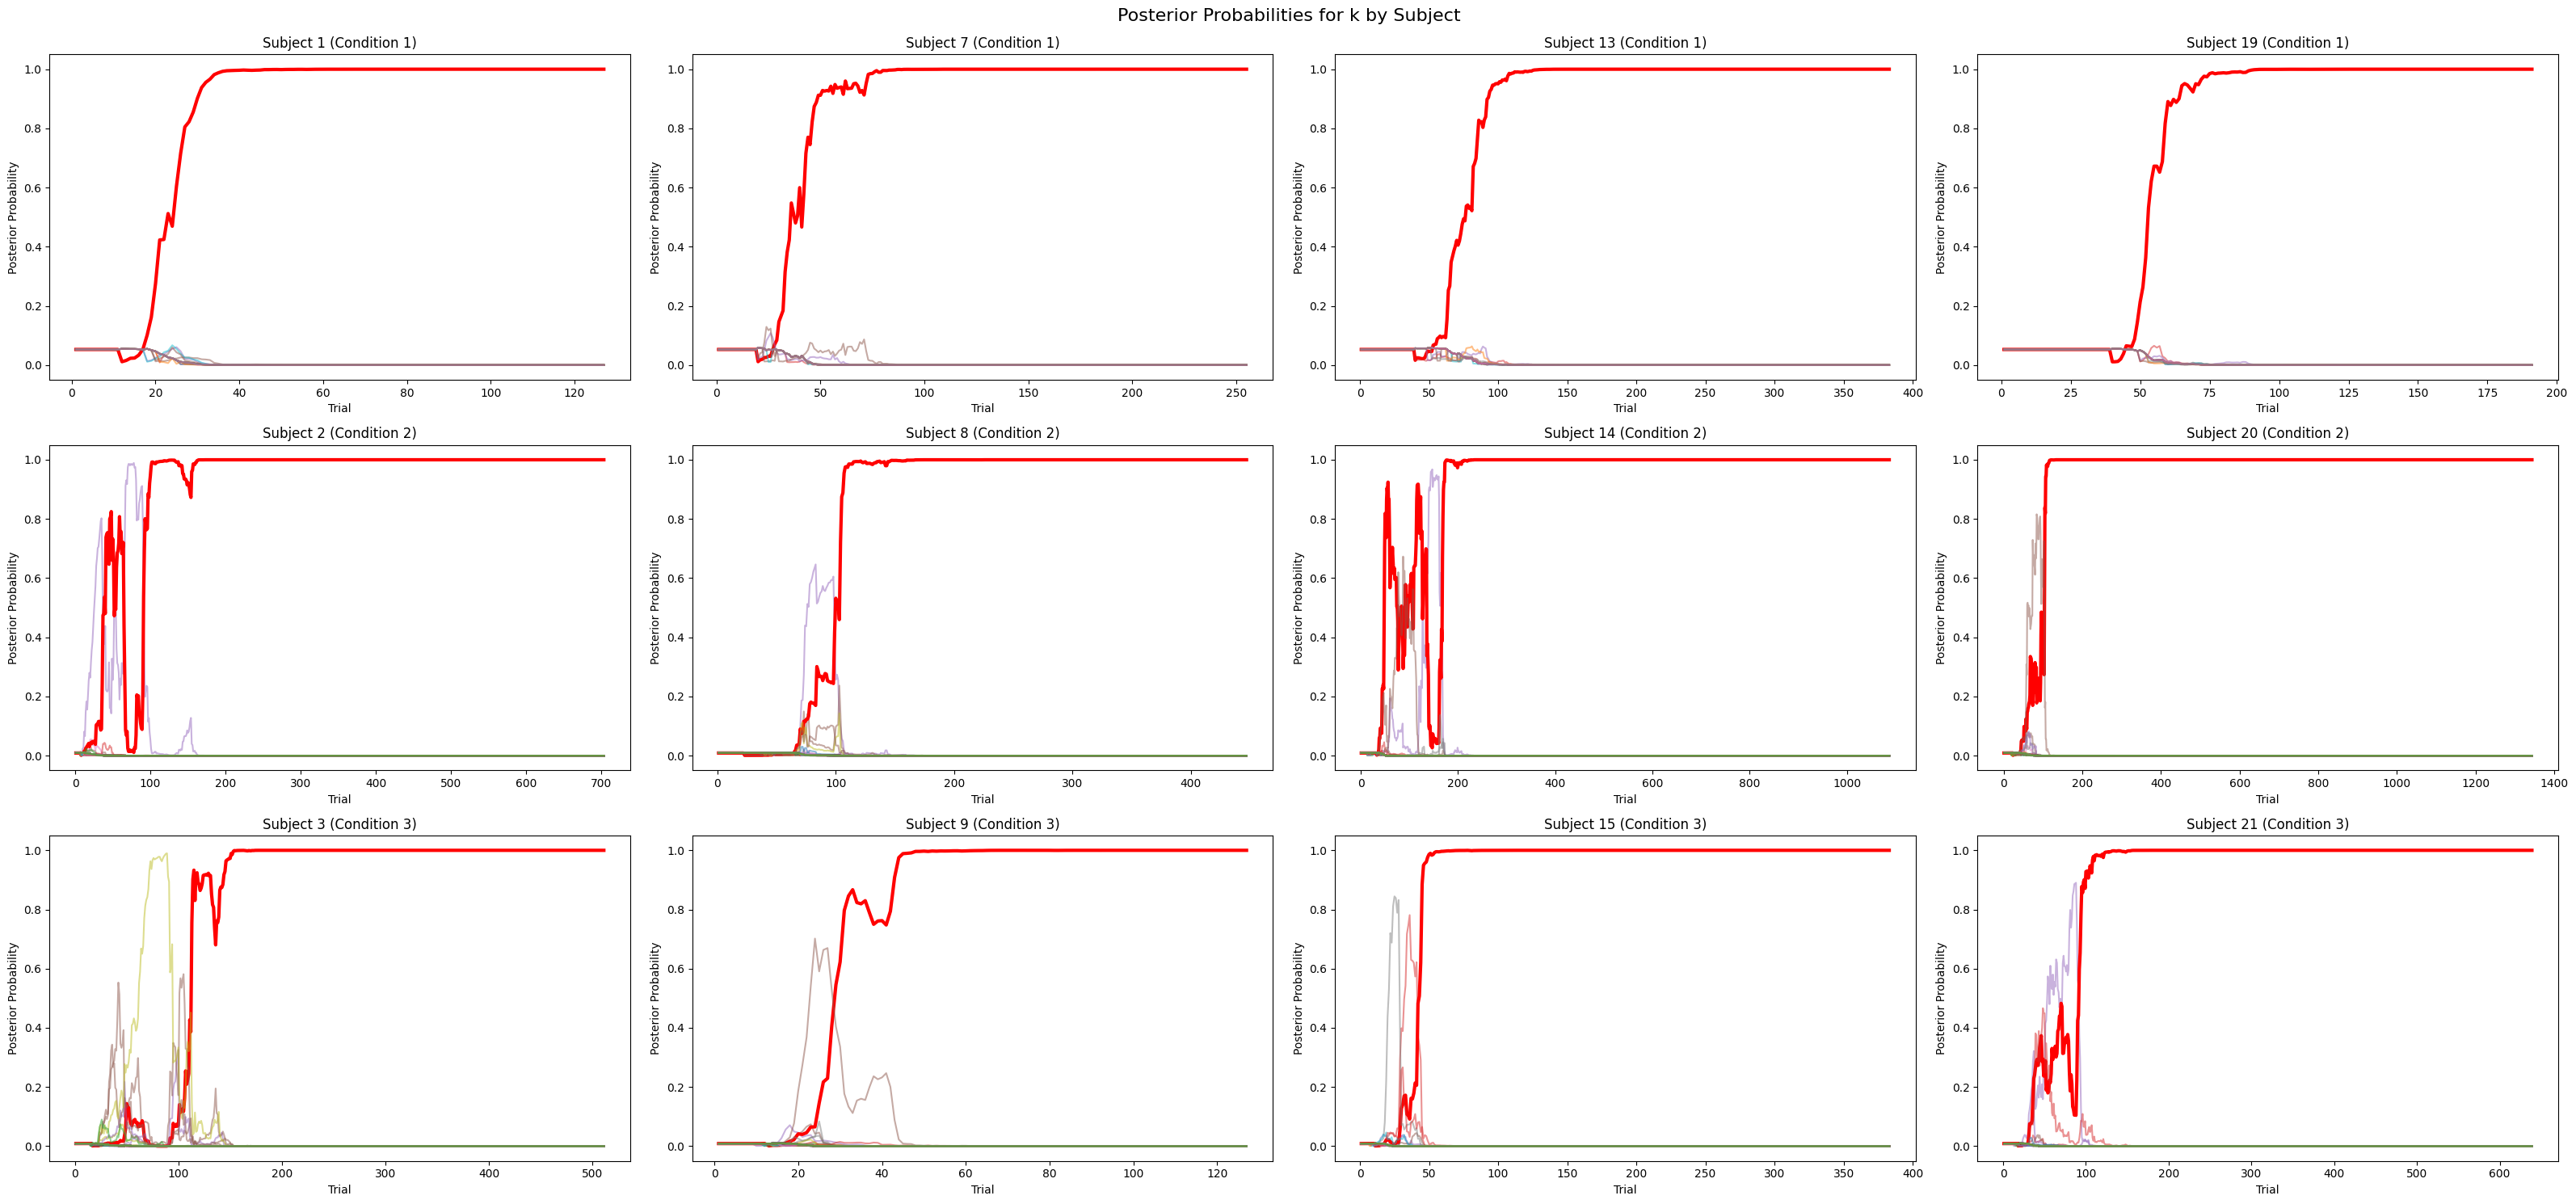

In [89]:
# 加载拟合结果
fitting_results = joblib.load(result_path / 'M_Dec_fitting_results.joblib')

# 绘制后验概率变化图
filename = f'M_Dec_posteriors.png'
model_eval.plot_posterior_probabilities(fitting_results, result_path / filename)

# 计算预测准确率
predictive_results = {}
for iSub, fit_result in fitting_results.items():
    try:
        subject_data = learning_data[learning_data['iSub'] == iSub]
        step_results = fit_result['step_results']
        condition = fit_result['condition']
        
        predictions = model_eval.calculate_predictions(model_base, subject_data, step_results)
        sliding_accuracy = model_eval.calculate_sliding_accuracy(predictions)
        
        predictive_results[iSub] = {
            'condition': condition,
            'step_results': step_results,
            'predictions': predictions,
            'sliding_accuracy': sliding_accuracy
        }
    except Exception as e:
        print(f"Error processing predictions for subject {iSub}: {str(e)}")
        continue

# 绘制预测准确率变化图
filename = f'M_Dec_predictive_accuracy.png'
model_eval.plot_predictive_accuracy(predictive_results, result_path / filename)